## CHECKING ASSOCIATION OF PREDICTORS WITH RESPONSE -
## POINT BISERIAL CORRELATION CO EFFICIENT

**Sayak Giri**

**Sagnik majumder**

**Aditya Misra**

**Debarshi Chakraborty**

## Step 1:
**Import necessary libraries**

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import stats 
from scipy.stats import iqr
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

## Step 2:
**Read tha data and remove irrelevant column**

In [124]:
df = pd.read_csv("data.csv")
df = df.rename(columns={"Bankrupt?": "Bankrupt"})
df = df.drop(df.columns[[94]], axis=1)
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


## Step 3:
**Normalise the data by CLT - assumption for computing point biserial correlation**

In [128]:
df1 = (df - df.mean())/df.std()
df1['Bankrupt'] = df['Bankrupt']
df1.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,-2.217747,-2.045648,-2.400185,-0.383306,-0.382610,0.016455,-0.023514,-0.020163,-0.087472,...,-0.034269,-2.254152,-0.049487,-0.084268,-0.383437,-0.861548,0.680121,-0.060026,-0.098971,-0.622022
1,1,-0.673779,-0.311045,-0.598406,0.135058,0.136297,0.014669,0.014798,0.015965,-0.005956,...,-0.034269,-0.309011,-0.049487,-0.021387,0.135243,-0.029802,0.240667,15.128707,0.364532,-0.535534
2,1,-1.303576,-0.908353,-1.319813,-0.383731,-0.388148,0.007857,-0.061107,-0.051179,-0.142227,...,-0.034269,-0.820449,-0.049487,-0.005984,-0.383670,-0.249802,0.679197,-0.062957,-0.125006,-0.621914
3,1,-1.735759,-1.636089,-1.556226,-1.441312,-1.441726,-0.004257,-0.017312,-0.008676,-0.024490,...,-0.034269,-1.691098,-0.049487,-0.080220,-1.441420,-0.392835,0.093758,-0.053899,-0.052558,-0.471791
4,1,-0.661729,-0.307722,-0.508013,-0.541198,-0.540668,0.016757,0.013702,0.016185,-0.013253,...,-0.034269,-0.315984,-0.049487,-0.032050,-0.541215,-0.029562,-0.128005,-0.178024,0.776338,-0.241697


In [129]:
X = df1.iloc[:,1:95]
Y = df1.iloc[:,0]
Y_new = map(str, Y) 
Y_obj = pd.DataFrame(Y_new,columns= ["Bankrupt"])
Y_obj.dtypes

Bankrupt    object
dtype: object

## Step 4:
**Check the counts of each group**

In [130]:
print(Y[Y==1].shape[0], Y[Y==0].shape[0])

220 6599


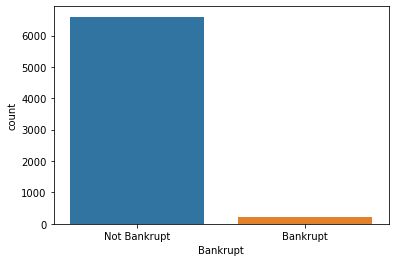

In [131]:
diagram = sns.countplot(df['Bankrupt'])
diagram.set_xticklabels(['Not Bankrupt','Bankrupt'])
plt.show()

**Clearly , the data is highly imbalanced**

## Step 5:
**Removing correlated features**

In [132]:
correlated_features = set()
col_no = set()
correlation_matrix = df1.drop('Bankrupt', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            col_no.add(i)  
            
            
            
df1 = df1.drop(df1.columns[[1,2,4,6,7,9,16,17,18,21,22,26,37,41,42,49,55,59,60,64,65,74,76,77,78,84,87,88,89]], axis=1)
df1.head()

,Bankrupt,ROA(B) before interest and depreciation after tax,Realized Sales Gross Margin,After-tax net Interest Rate,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Liability-Assets Flag,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,-2.400185,-0.382610,-0.020163,-0.031279,-0.616288,-0.750658,-0.545216,-0.15191,-0.829327,...,-0.108210,-1.247139,-0.206579,-0.034269,-2.254152,-0.861548,0.680121,-0.060026,-0.098971,-0.622022
1,1,-0.598406,0.136297,0.015965,0.009823,-0.616288,-0.750658,-0.326608,-0.15191,-0.829327,...,-0.095122,-0.449343,-0.109503,-0.034269,-0.309011,-0.029802,0.240667,15.128707,0.364532,-0.535534
2,1,-1.319813,-0.388148,-0.051179,-0.086560,-0.616288,-0.740843,-0.523060,-0.15191,-0.829327,...,-0.086673,-0.937910,-0.082322,-0.034269,-0.820449,-0.249802,0.679197,-0.062957,-0.125006,-0.621914
3,1,-1.556226,-1.441726,-0.008676,-0.011077,-0.616288,-0.750658,-0.101303,-0.15191,-0.829327,...,-0.445229,0.182546,-1.018459,-0.034269,-1.691098,-0.392835,0.093758,-0.053899,-0.052558,-0.471791
4,1,-0.508013,-0.540668,0.016185,0.013299,1.820639,-0.750658,-0.275008,-0.15191,-0.829327,...,-0.248419,-0.255226,-0.309796,-0.034269,-0.315984,-0.029562,-0.128005,-0.178024,0.776338,-0.241697


## Step 6:
**Testing for homoscedasticity - Levene's Test**

In [133]:
p = df1[df1.iloc[:,0]==True]
q = df1[df1.iloc[:,0]==False]

In [139]:
a = np.zeros(65)
for i in range(65):
    a[i] = stats.levene(p.iloc[:,i+1],q.iloc[:,i+1])[1]

len(a[a>0.05])

35

## Step 7:
**Testing for Normality - Shapiro Wilks Test**

In [138]:
b = np.zeros(65)
for i in range(65):
    b[i] = stats.shapiro(df1.iloc[:,i+1])[1]

len(b[b>0.05])

0

In [ ]:
#def ptbi(x):
    #y = df_new.iloc[:,0]
    #biser = stats.pointbiserialr(x, y)[0]
    #return biser 


#corr = []
#for i in range(1, 94):
  #x = df_new.iloc[:,i]
  #corr.append(ptbi(x))
    
    
    
#columns = list(X.columns)
#biser_df = pd.DataFrame(columns,columns= ["Features"])
#biser_df["PBC"] = corr
#biser_df["ABS PBC"] = np.abs(corr)
#biser_df

In [65]:
#biser_df.sort_values(by=['ABS PBC'], ascending=False).head(20)

In [66]:
#biser_df2 = biser_df.sort_values(by=['ABS PBC'], ascending=False).head(20)
#plt.figure(figsize=(16, 10))
#plt.barh(y=biser_df2['Features'], width=biser_df2['ABS PBC'], color='#1976D2')
#plt.title('Point Biserial Corr Coeff - Feature importances', fontsize=20, fontweight='bold', pad=20)
#plt.xlabel('Absolute PBC', fontsize=14, labelpad=20)
#plt.show()